[nltk_data] Downloading package punkt to /Users/mhh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mhh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mhh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(0, '0.051*"app" + 0.019*"help" + 0.013*"thank" + 0.011*"evolve" + 0.010*"good" + 0.010*"mental" + 0.010*"better" + 0.010*"lot" + 0.010*"helped" + 0.009*"health"')
(1, '0.081*"app" + 0.016*"meditation" + 0.015*"self" + 0.011*"help" + 0.011*"best" + 0.011*"amazing" + 0.009*"great" + 0.009*"growth" + 0.008*"like" + 0.008*"really"')
(2, '0.041*"app" + 0.032*"help" + 0.023*"love" + 0.016*"really" + 0.016*"self" + 0.015*"helpful" + 0.008*"good" + 0.008*"much" + 0.008*"nice" + 0.006*"meditation"')
(3, '0.037*"app" + 0.017*"really" + 0.015*"like" + 0.013*"feel" + 0.012*"good" + 0.011*"evolve" + 0.011*"help" + 0.009*"love" + 0.009*"time" + 0.008*"make"')
(4, '0.080*"app" + 0.034*"love" + 0.033*"self" + 0.028*"great" + 0.020*"really" + 0.019*"good" + 0.013*"growth" + 0.012*"help" + 0.011*"care" + 0.010*"personal"')


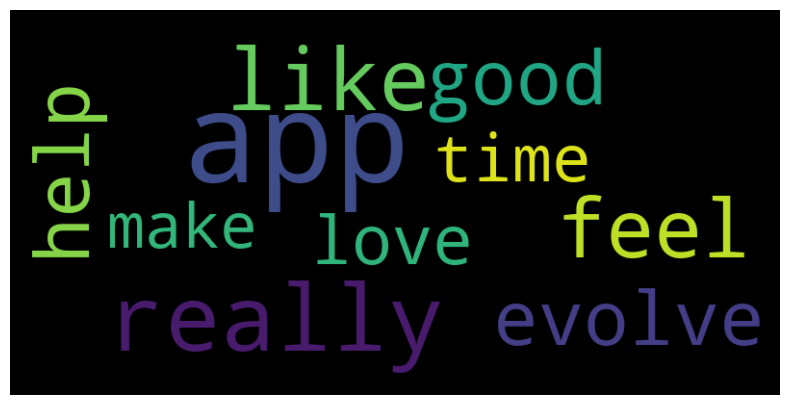

In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Load the CSV file
csv_file = 'data/in.evolve.android.csv'
df = pd.read_csv(csv_file)

# Assuming your CSV column containing the reviews is named 'content'
reviews = df['content'].astype(str)

# Preprocessing: Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

processed_reviews = [preprocess_text(review) for review in reviews]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_reviews)
corpus = [dictionary.doc2bow(review) for review in processed_reviews]

# Perform LDA topic modeling
num_topics = 5  # You can adjust this as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

# Print the top words for each topic
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Generate a word cloud for the most dominant topic
dominant_topic = lda_model[corpus[0]]
dominant_topic = sorted(dominant_topic, key=lambda x: -x[1])[0][0]
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(dict(lda_model.show_topic(dominant_topic)))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

